<a href="https://colab.research.google.com/github/chiyanglin-AStar/pytorch_practices/blob/master/pytorch_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install torch torchvision matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

## ref : https://www.tutorialspoint.com/pytorch/index.htm
## ================================================================== #
## Table of Contents                        #
## ================================================================== #



In [6]:
# vector basic operation
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0,67.3])
temp.size()

torch.Size([7])

In [7]:
# scalers example
x = torch.rand(10)
x.size()

torch.Size([10])

### Pytorch first neural network example

In [34]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [36]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

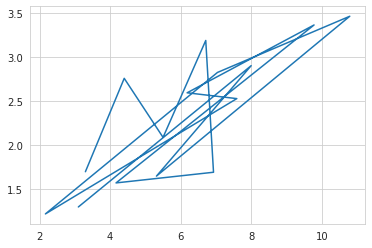

In [37]:
plt.plot(x_train,y_train)

In [38]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [39]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [40]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 21.9619
Epoch [10/60], Loss: 9.0001
Epoch [15/60], Loss: 3.7491
Epoch [20/60], Loss: 1.6218
Epoch [25/60], Loss: 0.7600
Epoch [30/60], Loss: 0.4109
Epoch [35/60], Loss: 0.2694
Epoch [40/60], Loss: 0.2121
Epoch [45/60], Loss: 0.1889
Epoch [50/60], Loss: 0.1795
Epoch [55/60], Loss: 0.1757
Epoch [60/60], Loss: 0.1741


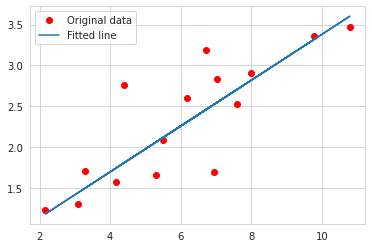

In [41]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [42]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')